In [ ]:
import numpy as np
import librosa

y, sr = librosa.load('/content/singing16k16bit-clean.wav',16000)
sp = librosa.stft(y,512,128,)
# S = (np.real(sp)**2+np.imag(sp)**2)**0.5
S = np.abs(librosa.stft(y,512,128,))
S.shape

(257, 1167)

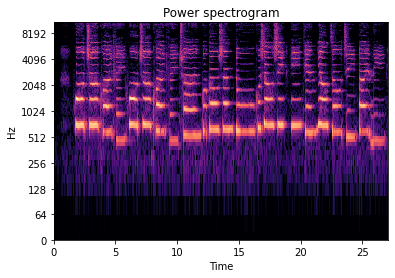

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
# 
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),y_axis='log', x_axis='time', ax=ax)

ax.set_title('Power spectrogram')
# fig.colorbar(img, ax=ax, format="%+2.0f dB")
ax

In [ ]:
from scipy import signal
import scipy
import matplotlib.pyplot as plt
import math
math.pi

3.141592653589793

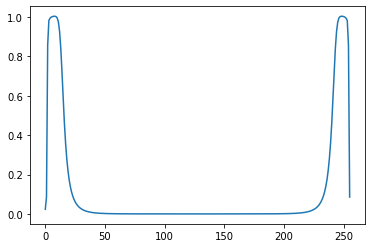

In [ ]:
b, a = signal.butter(4, [110/(16000/2),880/(16000/2)], 'bandpass', analog=False)
x=[0 for i in range(256)]
x[0]=1
plt.plot(np.abs(scipy.fftpack.fft(signal.lfilter(b,a,x))))
# w, h = signal.freqs(b, a)
# plt.semilogx(w, 20 * np.log10(abs(h)))
# plt.title('Butterworth filter frequency response')
# plt.xlabel('Frequency [radians / second]')
# plt.ylabel('Amplitude [dB]')
# plt.margins(0, 0.1)
# plt.grid(which='both', axis='both')
# plt.axvline(100, color='green') # cutoff frequency
# plt.show()

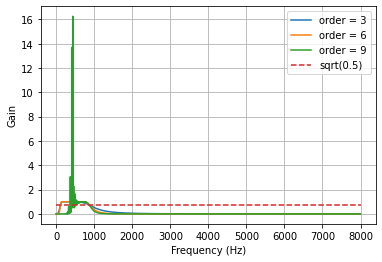

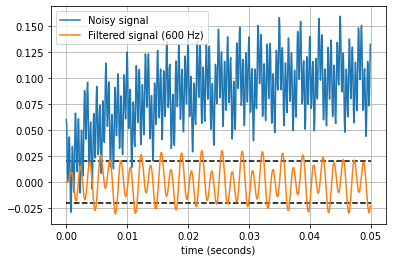

In [3]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 16000.0
    lowcut = 110.0
    highcut = 880.0

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [3, 6, 9]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    T = 0.05
    nsamples = int(T * fs)
    t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.02
    f0 = 600.0
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()


run()

In [5]:
fs = 16000.0
lowcut = 110.0
highcut = 880.0
b, a = butter_bandpass(lowcut, highcut, fs, order=4)

In [6]:
b, a

(array([ 0.00036227,  0.        , -0.0014491 ,  0.        ,  0.00217365,
         0.        , -0.0014491 ,  0.        ,  0.00036227]),
 array([  1.        ,  -7.15708642,  22.48238883, -40.49296543,
         45.74309315, -33.19118063,  15.10768358,  -3.94409676,
          0.45216372]))